<a href="https://colab.research.google.com/github/angel870326/Hierarchical-Clustering/blob/main/newtaipei_wordcloud_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> 2022.04.24 Ssu-Yun Wang<br/>
[Github @angel870326](https://github.com/angel870326)

#**Word Cloud Generated from Tf-idf for Clusters (New Taipei)**



####**Contents:**

1. Read file with clustering results
2. Tf-idf vectorizer
3. Create a dataframe for each clustering method
4. Method 1: Calculate average tf-idf for each cluster (straightforward method)
5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term
6. Word Cloud with Mask

<br/>

##**1. Read file with clustering results**

---



In [ ]:
# sConnect to the Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
cluster_result = pd.read_csv('/content/gdrive/My Drive/碩一下/Capstone/hierarchical_clustering/taipei/hierarchical_textcluster_newtaipei_r.csv')

In [ ]:
# cluster size
cluster_method_name = ['cluster_complete_3', 'cluster_complete_4', 'cluster_avg_3', 'cluster_avg_6', 'cluster_ward_3', 'cluster_ward_4']
clusterSizeDf = pd.DataFrame({'cluster':list('123456')})
for i in cluster_method_name:
  c = cluster_result[['c0101', i]].groupby(i).count().reset_index(i)
  clusterSizeDf[i] = c[['c0101']]

clusterSizeDf

,cluster,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_6,cluster_ward_3,cluster_ward_4
0,1,3227.0,1019.0,1453.0,359,2254.0,1197.0
1,2,678.0,2208.0,2508.0,1094,1935.0,1057.0
2,3,1146.0,678.0,1090.0,767,862.0,1935.0
3,4,NaN,1146.0,NaN,1741,NaN,862.0
4,5,NaN,NaN,NaN,404,NaN,NaN
5,6,NaN,NaN,NaN,686,NaN,NaN


##**2. Tf-idf vectorizer**


---


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# text contents in dataframe to array
contents = np.array(cluster_result['content']) 
contents

# tfidf vectorizer
vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', max_df=0.75) # ignore terms that appear in more than 75% of the documents
tfidf_matrix = vectorizer.fit_transform(contents)

# See all terms
terms = vectorizer.get_feature_names_out()
print("Terms: ",terms)

# Store vectorized texts in df
cluster_result['tfidf'] = list(tfidf_matrix.toarray())
cluster_result

Terms:  ['24小時' '一般' '三十一年至三十五年屋齡' '三十六年至四十年屋齡' '中公設比' '二十ㄧ年至二十五年屋齡' '二十六年至三十年屋齡'
 '五年內屋齡' '六年至十年屋齡' '其他管理形式' '北' '十一年至十五年屋齡' '十六年至二十年屋齡' '南' '四十年以上屋齡'
 '多戶數' '多方位' '夜間管理' '大公設比' '小公設比' '少戶數' '日間管理' '有平面車位' '有機械車位' '東' '東北'
 '東南' '極多戶數' '極少戶數' '無平面車位' '無管理' '臨單線道' '臨多線道' '臨雙線道' '西' '西北' '西南'
 '近一年有實價登錄' '近一年無實價登錄' '重點']


,c0101,content,tfidf,cluster_complete_3,cluster_complete_4,cluster_avg_3,cluster_avg_6,cluster_ward_3,cluster_ward_4
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.19730299808483578, 0.0, 0.5604191280551065,...",2,3,1,1,1,2
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年無實價登錄,臨單線道,有...","[0.21766972418864192, 0.2688279697866283, 0.0,...",1,1,2,3,1,2
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,小公設比,近一年有實價登錄,臨雙線道,...","[0.17187360943267946, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,1,2,4,2,3
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,無...","[0.0, 0.2459025960196192, 0.0, 0.0, 0.28049305...",1,1,2,3,1,2
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,中公設比,近一年無實價登錄,臨多線道,...","[0.17090511311084186, 0.0, 0.0, 0.0, 0.2407634...",1,1,2,4,2,3
...,...,...,...,...,...,...,...,...,...
5046,Y001224,"東,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.21186883673941603, 0.26166371760709856, 0.0...",1,2,1,2,1,1
5047,Y001227,"一般,二十六年至三十年屋齡,極多戶數,中公設比,近一年有實價登錄,有平面車位,無機械車位","[0.0, 0.33488976315863883, 0.0, 0.0, 0.3819978...",1,1,2,4,2,3
5048,Y001233,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1,2,1,2,1,1
5049,Y001237,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1,2,1,2,1,1


##**3. Create a dataframe for each clustering method**


---


In [ ]:
cluster_complete_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_3']]
cluster_complete_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_complete_4']]
cluster_avg_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_3']]
cluster_avg_6 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_avg_6']]
cluster_ward_3 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_3']]
cluster_ward_4 = cluster_result[['c0101', 'content', 'tfidf', 'cluster_ward_4']]

cluster_complete_3

,c0101,content,tfidf,cluster_complete_3
0,0000001,"西南,24小時,重點,三十一年至三十五年屋齡,少戶數,小公設比,近一年有實價登錄,臨單線道,...","[0.19730299808483578, 0.0, 0.5604191280551065,...",2
1,0000008,"西南,24小時,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年無實價登錄,臨單線道,有...","[0.21766972418864192, 0.2688279697866283, 0.0,...",1
2,0000010,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,小公設比,近一年有實價登錄,臨雙線道,...","[0.17187360943267946, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,0000011,"西南,日間管理,一般,二十六年至三十年屋齡,少戶數,中公設比,近一年有實價登錄,臨單線道,無...","[0.0, 0.2459025960196192, 0.0, 0.0, 0.28049305...",1
4,0000012,"東北,24小時,重點,二十六年至三十年屋齡,極多戶數,中公設比,近一年無實價登錄,臨多線道,...","[0.17090511311084186, 0.0, 0.0, 0.0, 0.2407634...",1
...,...,...,...,...
5046,Y001224,"東,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有平...","[0.21186883673941603, 0.26166371760709856, 0.0...",1
5047,Y001227,"一般,二十六年至三十年屋齡,極多戶數,中公設比,近一年有實價登錄,有平面車位,無機械車位","[0.0, 0.33488976315863883, 0.0, 0.0, 0.3819978...",1
5048,Y001233,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1
5049,Y001237,"東北,24小時,一般,十一年至十五年屋齡,極少戶數,中公設比,近一年有實價登錄,臨單線道,有...","[0.21475978671829885, 0.2652341186652826, 0.0,...",1


##**4. Method 1: Calculate average tf-idf for each cluster (straightforward method)**

*   Regard each observation as a document and calculate tf-idf for each term (just like what we do in [text clustering](https://github.com/angel870326/Hierarchical-Clustering/blob/main/newtaipei_pca_hierarchical_text.ipynb))

*   Calculate average tf-idf for each cluster


In [ ]:
# Build a dataframe for a cluster 
def clusterdf(method,column,clusterID):
  return method[method[column] == clusterID]

# Calculate average tfidf for a cluster
def avgTfidf(clusterdf):
  return clusterdf['tfidf'].to_numpy().mean(axis=0)

# Store feature weights for clusters
cluster_feature_weight_1 = pd.DataFrame(terms, columns=['feature']) 
def clusterFeatureWeight(clusterType,clusterResult,clusterSize):
  for i in range(1,clusterSize+1):
    cluster = clusterdf(clusterResult,clusterType,i)
    cluster_feature_weight_1['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(avgTfidf(cluster))

In [ ]:
clusterFeatureWeight('cluster_complete_3',cluster_complete_3,3)
clusterFeatureWeight('cluster_complete_4',cluster_complete_4,4)
clusterFeatureWeight('cluster_avg_3',cluster_avg_3,3)
clusterFeatureWeight('cluster_avg_6',cluster_avg_6,6)
clusterFeatureWeight('cluster_ward_3',cluster_ward_3,3)
clusterFeatureWeight('cluster_ward_4',cluster_ward_4,4)

cluster_feature_weight_1

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_6_4,avg_6_5,avg_6_6,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.191691,0.138191,0.034753,0.181402,0.196439,0.138191,0.034753,0.069677,0.195616,...,0.196196,0.125839,0.159511,0.097376,0.199526,0.169998,0.062099,0.137325,0.199526,0.169998
1,一般,0.090322,0.190116,0.232112,0.124197,0.074689,0.190116,0.232112,0.215406,0.089820,...,0.066570,0.138311,0.134457,0.201633,0.068076,0.116194,0.219380,0.181535,0.068076,0.116194
2,三十一年至三十五年屋齡,0.002793,0.152691,0.047499,0.003048,0.002676,0.152691,0.047499,0.114565,0.000203,...,0.000293,0.000000,0.000000,0.073790,0.000335,0.000000,0.001290,0.155894,0.000335,0.000000
3,三十六年至四十年屋齡,0.000863,0.008432,0.012844,0.000000,0.001261,0.008432,0.012844,0.014076,0.001104,...,0.001590,0.000000,0.000000,0.009690,0.000713,0.000000,0.000000,0.020664,0.000713,0.000000
4,中公設比,0.138003,0.060514,0.094783,0.098250,0.156350,0.060514,0.094783,0.111856,0.150582,...,0.177377,0.018394,0.069053,0.100628,0.172107,0.040772,0.122085,0.076328,0.172107,0.040772
5,二十ㄧ年至二十五年屋齡,0.066107,0.047308,0.090872,0.000000,0.096616,0.047308,0.090872,0.068262,0.098666,...,0.142134,0.006286,0.000529,0.052615,0.118961,0.000880,0.091874,0.008156,0.118961,0.000880
6,二十六年至三十年屋齡,0.121178,0.023593,0.084758,0.371646,0.005586,0.023593,0.084758,0.090756,0.147964,...,0.044550,0.002986,0.000000,0.147317,0.084844,0.009216,0.053254,0.253839,0.084844,0.009216
7,五年內屋齡,0.028416,0.133983,0.027701,0.000000,0.041530,0.133983,0.027701,0.000000,0.000206,...,0.000297,0.529125,0.000000,0.000208,0.000000,0.248044,0.000392,0.000000,0.000000,0.248044
8,六年至十年屋齡,0.061995,0.095350,0.059600,0.000000,0.090606,0.095350,0.059600,0.000000,0.000167,...,0.000241,0.009494,0.479233,0.047893,0.000681,0.259558,0.090184,0.000000,0.000681,0.259558
9,其他管理形式,0.004547,0.006275,0.007249,0.000606,0.006366,0.006275,0.007249,0.006291,0.000789,...,0.001137,0.039889,0.000000,0.004361,0.001394,0.017063,0.000534,0.008695,0.001394,0.017063


##**5. Method 2: Regard each cluster as a document and recalculate tf-idf for each term**




In [ ]:
# Group contents(row) in the same cluster(column value)
def groupClusterContents(clusterType,clusterResult):
  return clusterResult.groupby(clusterType)['content'].agg(lambda column: ",".join(column)).reset_index()

# tfidf vectorizer
def tfidfVectorize(clusterResult):
  content = np.array(clusterResult['content']) 
  vectorize = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b')
  tfidfMatrix = vectorize.fit_transform(content)
  # Store vectorized texts in df
  clusterResult['tfidf'] = list(tfidfMatrix.toarray())

# Store feature weights for clusters
cluster_feature_weight_2 = pd.DataFrame(terms, columns=['feature']) 
def createFeatureWeightDF(clusterType,clusterResult):
  for i in range(1,clusterResult.shape[0]+1):
    tfidfweight = clusterResult.iloc[i-1,-1]
    cluster_feature_weight_2['%s_%d'%(clusterType[8:],i)] = pd.DataFrame(tfidfweight)

# Create feature weight dataframe
def method2(clusterType,clusterResult):
  clusterName = clusterType[8:]
  clusterName = groupClusterContents(clusterType,clusterResult)
  tfidfVectorize(clusterName)
  createFeatureWeightDF(clusterType,clusterName)

In [ ]:
method2('cluster_complete_3',cluster_complete_3)
method2('cluster_complete_4',cluster_complete_4)
method2('cluster_avg_3',cluster_avg_3)
method2('cluster_avg_6',cluster_avg_6)
method2('cluster_ward_3',cluster_ward_3)
method2('cluster_ward_4',cluster_ward_4)

cluster_feature_weight_2

,feature,complete_3_1,complete_3_2,complete_3_3,complete_4_1,complete_4_2,complete_4_3,complete_4_4,avg_3_1,avg_3_2,...,avg_6_4,avg_6_5,avg_6_6,ward_3_1,ward_3_2,ward_3_3,ward_4_1,ward_4_2,ward_4_3,ward_4_4
0,24小時,0.409156,0.330669,0.079390,0.356679,0.411714,0.328763,0.079078,0.166133,0.410179,...,0.404927,0.237625,0.285795,0.223933,0.417187,0.361205,0.141000,0.283631,0.416138,0.351662
1,一般,0.150089,0.357724,0.448293,0.191736,0.122289,0.355662,0.446531,0.417736,0.145451,...,0.106893,0.205221,0.193585,0.386022,0.111576,0.191758,0.414753,0.310235,0.111295,0.186691
2,三十一年至三十五年屋齡,0.002369,0.135274,0.042715,0.002512,0.002173,0.134494,0.042547,0.130389,0.000226,...,0.000380,0.000000,0.000000,0.084810,0.000286,0.000000,0.001513,0.153254,0.000271,0.000000
3,三十六年至四十年屋齡,0.000557,0.006012,0.008198,0.000000,0.000967,0.007311,0.009988,0.011934,0.000905,...,0.001799,0.000000,0.000000,0.008337,0.000572,0.000000,0.000000,0.018800,0.000670,0.000000
4,中公設比,0.211406,0.108219,0.167840,0.138569,0.234306,0.107595,0.167181,0.197369,0.226609,...,0.260293,0.026512,0.090492,0.174815,0.255602,0.062149,0.213149,0.114139,0.254959,0.060506
5,二十ㄧ年至二十五年屋齡,0.069958,0.054861,0.105278,0.000000,0.121305,0.066716,0.128264,0.077918,0.102589,...,0.164119,0.007933,0.000661,0.060951,0.120911,0.001062,0.104307,0.008582,0.120607,0.001034
6,二十六年至三十年屋齡,0.145490,0.033067,0.109592,0.422405,0.006915,0.032876,0.109162,0.120481,0.173382,...,0.062107,0.004533,0.000000,0.192006,0.102241,0.011686,0.067614,0.298649,0.101984,0.011377
7,五年內屋齡,0.023412,0.108219,0.024594,0.000000,0.040596,0.131604,0.029963,0.000000,0.000226,...,0.000450,0.667515,0.000000,0.000287,0.000000,0.251711,0.000623,0.000000,0.000000,0.287527
8,六年至十年屋齡,0.058530,0.093189,0.064720,0.000000,0.101490,0.113326,0.078851,0.000000,0.000226,...,0.000380,0.016846,0.609195,0.051797,0.000667,0.243814,0.116992,0.000000,0.000814,0.290340
9,其他管理形式,0.003066,0.004509,0.005178,0.000419,0.004149,0.004483,0.005157,0.004462,0.000527,...,0.001139,0.036754,0.000000,0.003126,0.000889,0.011686,0.000412,0.005578,0.000887,0.011377


##**6. Word Cloud with Mask**


---



In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Mandarin
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
font = 'TaipeiSansTCBeta-Regular.ttf'

--2022-04-24 10:37:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.102, 74.125.142.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g6vmf4hn66pvf0u14tncsv4sse402c02/1650796575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-24 10:37:26--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g6vmf4hn66pvf0u14tncsv4sse402c02/1650796575000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|74.125.195.132

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload mask image from local device
uploaded = files.upload()
housemask = np.array(Image.open(BytesIO(uploaded['house1.jpg'])))

Saving house1.jpg to house1 (2).jpg


In [ ]:
# Create feature weight dictionary
def featureWeightDict(method,column):
  feature_weight = pd.DataFrame(method['feature'])
  feature_weight[column] = method[column]
  return feature_weight.set_index('feature')[column].to_dict()

# Word cloud
def createWordCloud(dictionary):
  return WordCloud(margin=0, font_path=font, background_color='white', max_words=15, width=housemask.shape[1], height=housemask.shape[0], mask = housemask).generate_from_frequencies(dictionary)

# Show cloud
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
def showWordCloud(cloud,size,num):
  ax = fig.add_subplot(1, size, num)
  ax.imshow(cloud, interpolation='bilinear')
  ax.axis("off")

# Create cluster word cloud
def createClusterWC(method,clusterList):
  num = 0
  for i in clusterList:
    num = num+1
    fwdict = featureWeightDict(method,i)
    wc = createWordCloud(fwdict)
    showWordCloud(wc,len(clusterList),num)


<Figure size 432x288 with 0 Axes>

###**3.1 Complete-Link Cluster**

####3 clusters

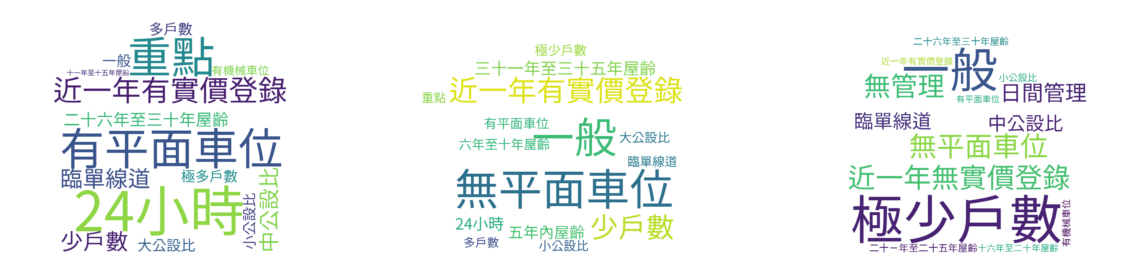

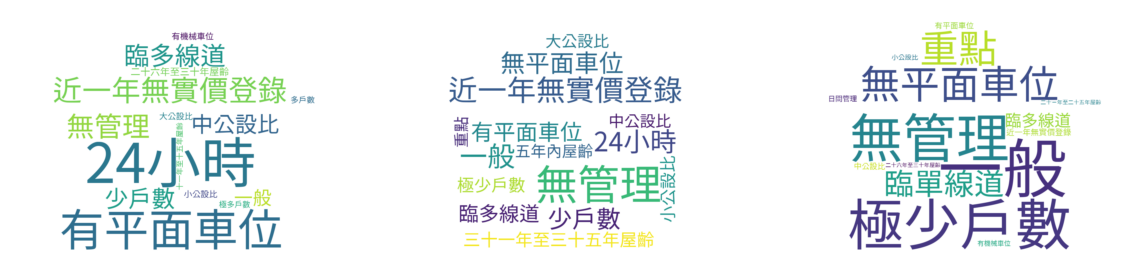

In [ ]:
complete3_list = ['complete_3_1','complete_3_2','complete_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, complete3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, complete3_list)

####4 clusters

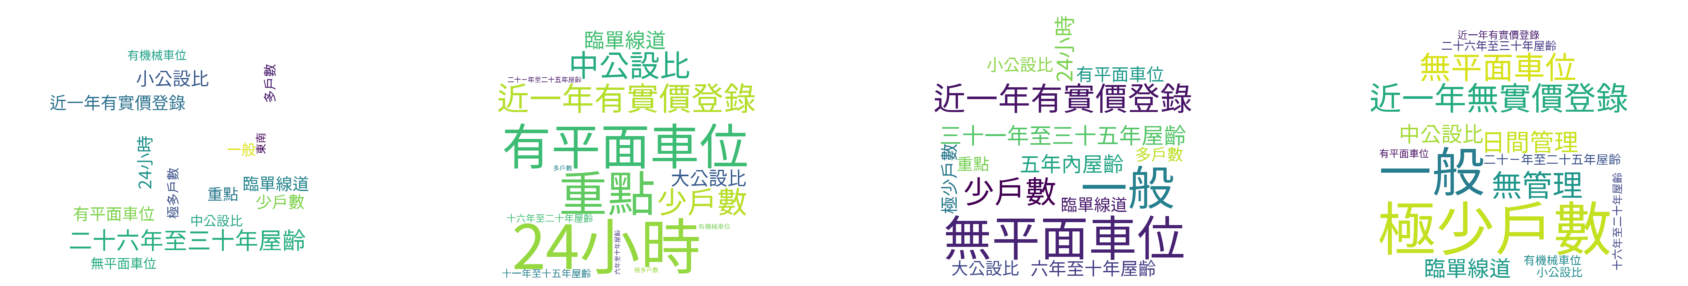

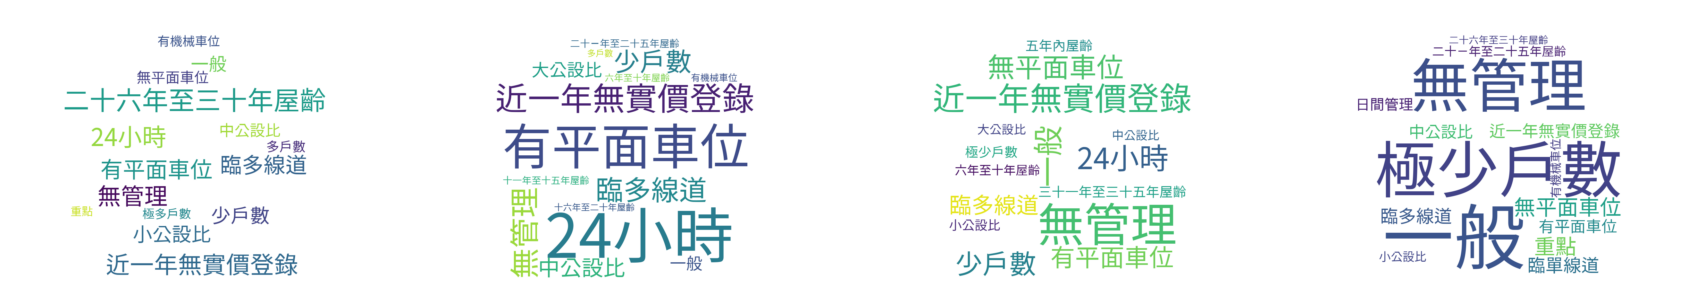

In [ ]:
complete4_list = ['complete_4_1','complete_4_2','complete_4_3','complete_4_4']

# Method 1
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_1, complete4_list)

# Method 2
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_2, complete4_list)

###**3.2 Group Average Cluster**

####3 clusters

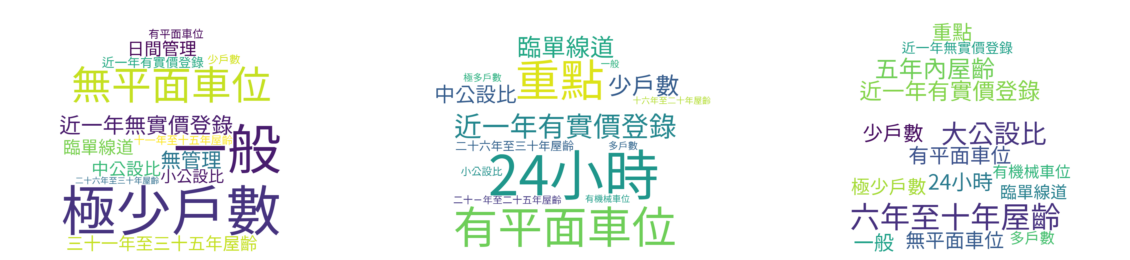

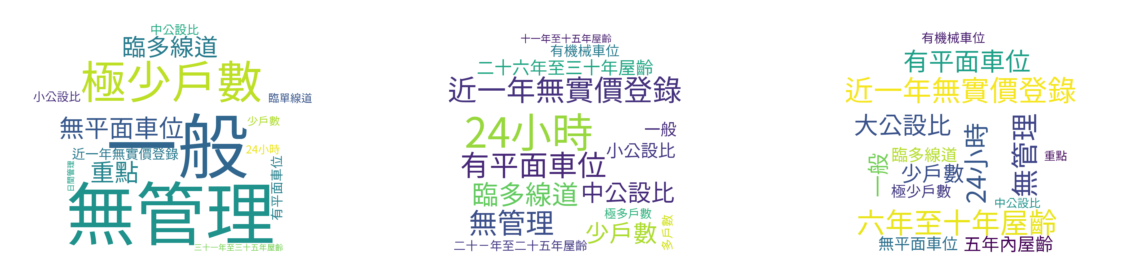

In [ ]:
avg3_list = ['avg_3_1','avg_3_2','avg_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, avg3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, avg3_list)

####6 clusters

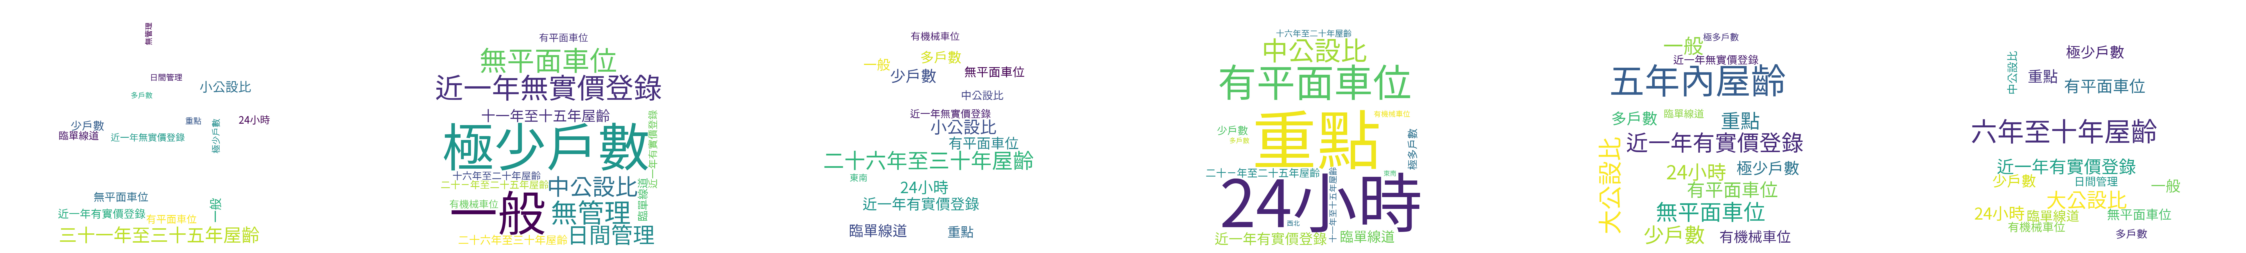

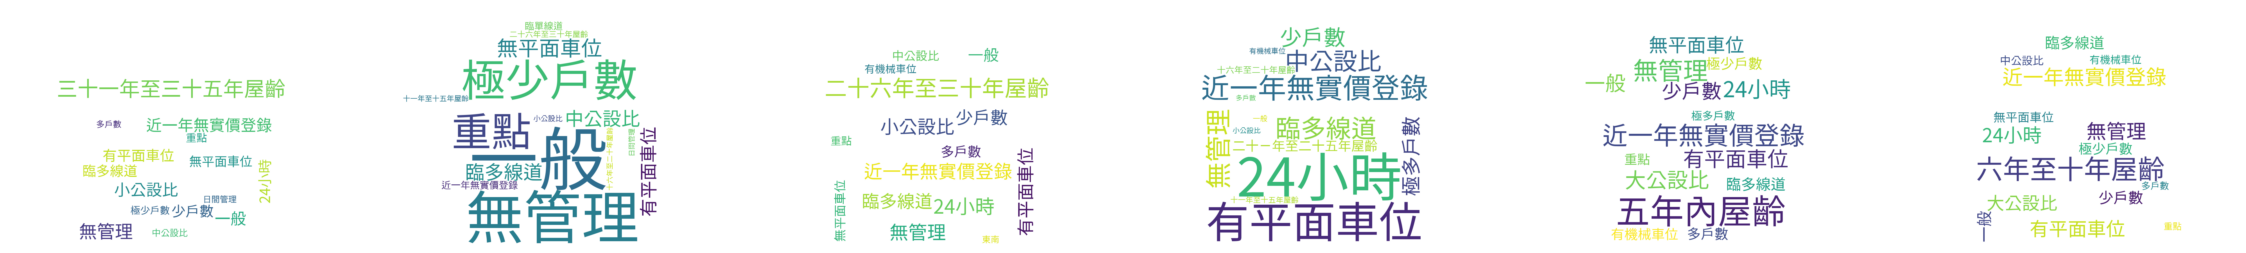

In [ ]:
avg6_list = ['avg_6_1','avg_6_2','avg_6_3','avg_6_4','avg_6_5','avg_6_6']

# Method 1
fig = plt.figure(figsize=(40, 10))
createClusterWC(cluster_feature_weight_1, avg6_list)

# Method 2
fig = plt.figure(figsize=(40, 10))
createClusterWC(cluster_feature_weight_2, avg6_list)

###**3.3 Ward Cluster**

####3 clusters

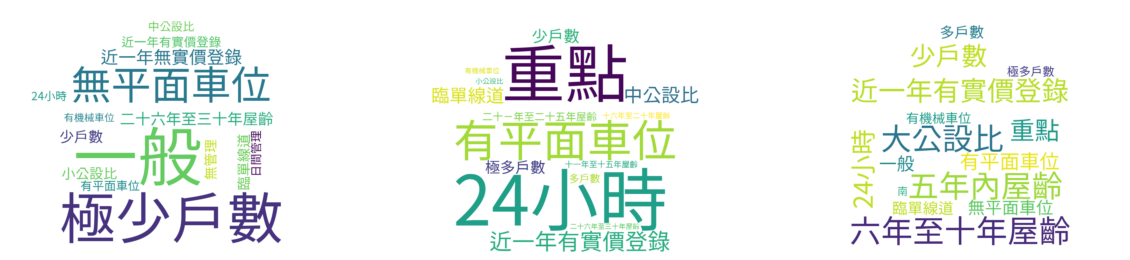

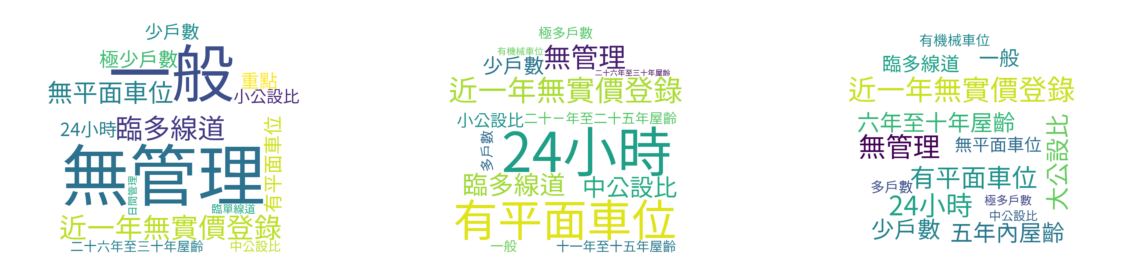

In [ ]:
ward3_list = ['ward_3_1','ward_3_2','ward_3_3']

# Method 1
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_1, ward3_list)

# Method 2
fig = plt.figure(figsize=(20, 10))
createClusterWC(cluster_feature_weight_2, ward3_list)

####4 clusters

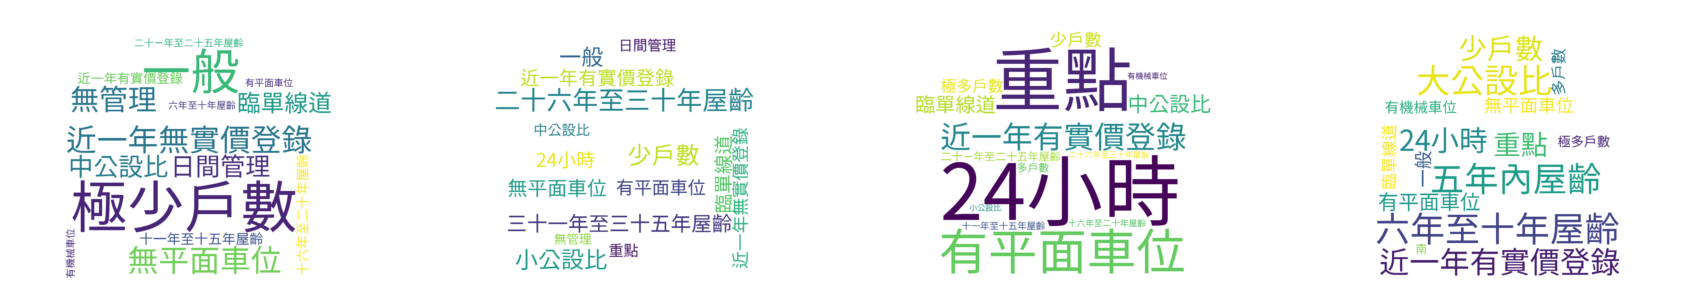

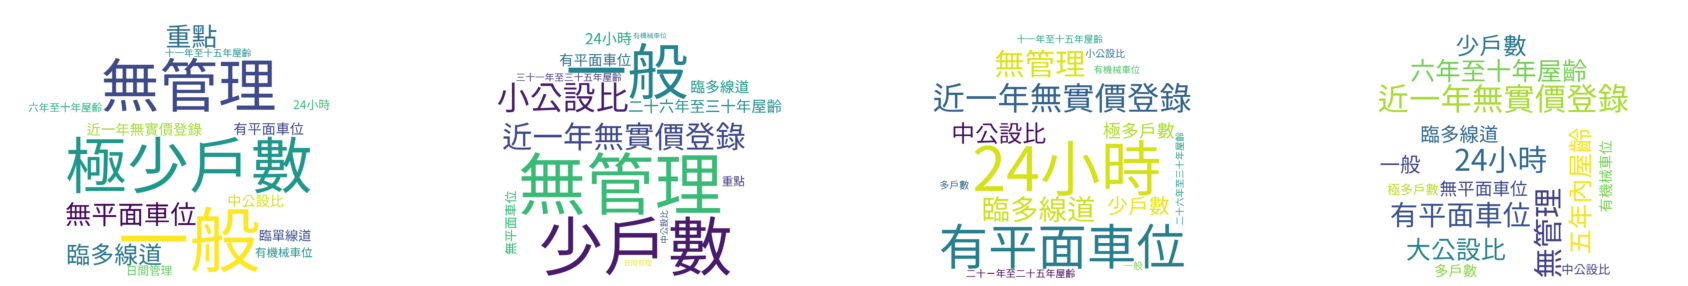

In [ ]:
ward4_list = ['ward_4_1','ward_4_2','ward_4_3','ward_4_4']

# Method 1
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_1, ward4_list)

# Method 2
fig = plt.figure(figsize=(30, 10))
createClusterWC(cluster_feature_weight_2, ward4_list)